## 1. Import necessary Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Dataset

In [2]:
# Importing Dataset
df = pd.read_csv(r'D:\Internships\Prodigy\Task3_DecisionTreeClassifier\train.csv')

# Verify
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3. Data Understanding

The dataset pertains to direct marketing campaigns conducted by a Portuguese banking institution. These campaigns involved phone calls, often requiring multiple contacts with the same client to determine if they would subscribe to a bank term deposit (indicated as 'yes') or not (indicated as 'no').

#### Objective:
The goal is to classify whether a client will subscribe to a term deposit (variable y) based on various features.


#### Variable Definitions:1. **age      :** Age of bank customers, ranging from 18 to 95.
2. **job      :** Type of job (e.g., housemaid, blue-collar, management, retired).
3. **marital  :** Marital status (e.g., married, single, divorced).
4. **education:** Education level (e.g., high school, illiterate, university degree).
5. **default  :** Indicates if the customer has credit in default.
6. **balance  :** Average yearly balance of customers.
7. **housing  :** Indicates whether the customer has a housing loan.
8. **loan     :** Indicates whether the customer has a personal loan.
9. **contact  :** Type of communication used to contact the customer (e.g., cellular, telephone).
10. **day :** Day of the week when the last contact was made(Date).
11. **month :** Month of the last contact..
12. **duration :** Duration of the last call in seconds.
13. **campaign :** Number of contacts made during this campaign for this client (numeric, includes the last contact).
14. **pdays :** Number of days since the client was last contacted in a previous campaign.
15. **previous :** Number of contacts made before this campaign for this client.
16. **poutcome :** Outcome of the previous marketing campaign
17. **y :** Indicates whether the client subscribed to a term deposit (yes/no).f the week

In [3]:
# Viewing the shape
df.shape

(45211, 17)

In [4]:
# Viewing the data
df.describe(percentiles =[0.25,0.5,0.75,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- The bank's outreach spanned customers aged from 18 to 95 years old.

- The average annual balance ranges from a -8k to 1 lakh.

- The average call duration with customers is 258 seconds, with the longest call lasting 4918 seconds, indicating significant variability in call lengths.

- The maximum number of contacts made to a customer during this campaign is 63, which could potentially annoy customers who are not interested. Additionally, the maximum number of contacts made before this campaign is 275. However, the 99th percentile for previous contacts is 8, suggesting outliers in the data. During the previous campaign, the maximum number of contacts made was 871.

## 4. Data Cleaning

In [5]:
# Viewing the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We have observed that there are no missing values in the dataset. However, there are values labeled as "unknown". Upon inspection, it was found that the columns - **job, education, contact, and poutcome** contain 'unknown' values.

Also The value -1 in the 'pdays' column represents missing data.

Let's convert these "unknown" and -1 values to NaN (Not a Number) using the numpy function and handle them as missing values.

In [6]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Converting the values with -1 value to Null
df.pdays[df.pdays == -1] = np.nan

# Assigning the columns with unknown values to col
col = ['job', 'education', 'contact', 'poutcome']

for column in col:
    df[column].replace('unknown', np.nan, inplace=True)

# Viewing percentage of missing values
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

job           0.64
education     4.11
contact      28.80
pdays        81.74
poutcome     81.75
dtype: float64

`pdays` and `poutcome` has more than 80% missing values, these should clearly be dropped.

#### 4.1 Handling missing values - Dropping

In [8]:
# Dropping - 1. pdays & 2. poutcome
df.drop(['pdays','poutcome'] , inplace = True, axis = 1)

# Viewing percentage of missing values
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

job           0.64
education     4.11
contact      28.80
dtype: float64

#### 4.2 Handling missing values - Imputing

Since `job` and `education` columns has less than 5% of the data contains missing values, we will proceed by imputing these values with the mode.

In [9]:
# Viewing the mode value of the column  3. job
print('Mode for Job column:')
df.job.value_counts()[:1]

Mode for Job column:


job
blue-collar    9732
Name: count, dtype: int64

In [10]:
# Imputing missing values with mode value
df.loc[df['job'].isna() , 'job'] = 'blue-collar'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

education     4.11
contact      28.80
dtype: float64

In [11]:
# Viewing the mode value of the column 4. education
print('Mode for Education column:')
df.education.value_counts()[:1]

Mode for Education column:


education
secondary    23202
Name: count, dtype: int64

In [12]:
# Imputing missing values with mode value
df.loc[df['education'].isna() , 'education'] = 'secondary'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

contact    28.8
dtype: float64

- We have one remaining variable, 'contact', with 28% missing values. This high percentage of missing data needs to be handled effectively as it could significantly impact the model.
- 
After attempting to find a pattern among the data to predict the 'contact' variable by examining individual variables, no significant correlation was found. Therefore, we will proceed by imputing the missing values with the mode.

In [13]:
# Viewing the mode value of the column 5. contact
print('Mode for Contact column:')
df.contact.value_counts()[:1]

Mode for Contact column:


contact
cellular    29285
Name: count, dtype: int64

In [14]:
# Imputing missing values with mode value
df.loc[df.contact.isnull(), 'contact'] = 'cellular'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

Series([], dtype: float64)

### 4.3 Outliers

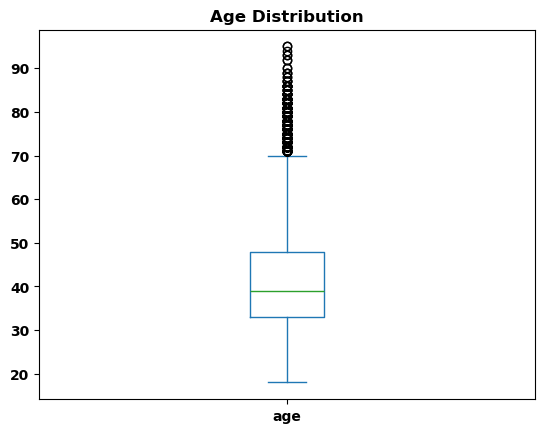

In [15]:
# 1. Age
# Viewing the box plot of Age
plt.title('Age Distribution')
df.age.plot.box()
plt.show()

The age column contains continuous values. The box plot indicates outliers for ages above 70, which is due to their lower frequency compared to younger ages. However, these ages are legitimate as there are indeed a few people older than 70.

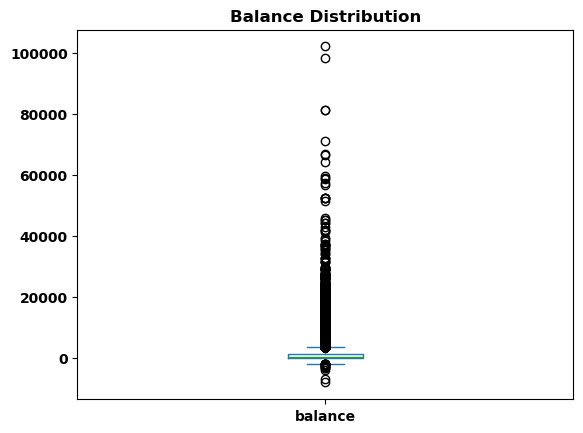

In [16]:
# 2. Balance
plt.title('Balance Distribution')
df.balance.plot.box()
plt.show()

In [17]:
# Viewing the number of people with more than 40 k average balance
df[df.balance > 40000].shape

(28, 15)

The average annual balance is 1362 , while the maximum is around 1 lakh, lets view the people with more than 50k deposits.

There are only a handful of people with more than 50 k bank balance but the data is legitimate and is not  mistaken, it might help the model, hence leaving the values and proceeding to the next.

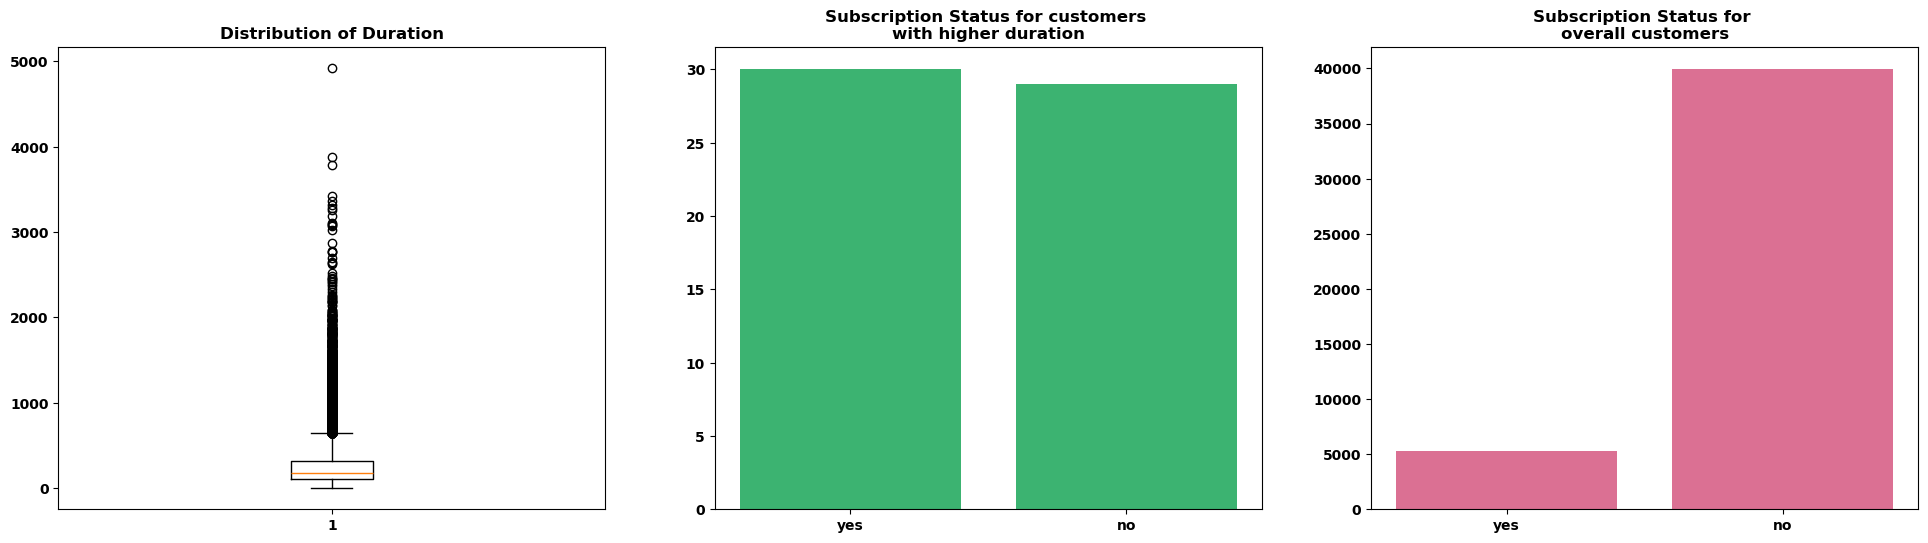

In [18]:
# Creating sub plots
fig,axes = plt.subplots(1,3,figsize = [24,6])

# 3. Duration
axes[0].boxplot(df.duration)
axes[0].set_title('Distribution of Duration')

# Plotting first chart for Subscription Status of customer duration more than 2k
data = df.y[df.duration > 2000].value_counts()
axes[1].bar(data.index, data.values, color = 'mediumseagreen')
axes[1].set_title('Subscription Status for customers \nwith higher duration')

# Plotting second chart with Subscription Status of all customers
data = df.y.value_counts()
axes[2].bar(data.index[::-1], data.values[::-1], color = 'palevioletred')
axes[2].set_title('Subscription Status for \noverall customers')

plt.show()

From the above box plot, we observe outliers in the data. Further analysis using bar charts reveals that the overall subscription rate is only 11%. However, when filtering for durations greater than 2000 seconds i.e 33 mins, the subscription rate is slightly higher or equal. Therefore, these findings are meaningful and should be considered in the machine learning model.

## 5. Exploratory Data Analysis (EDA)

Data Visualization and Variable Analysis

### 5.1 Bivariate Analysis

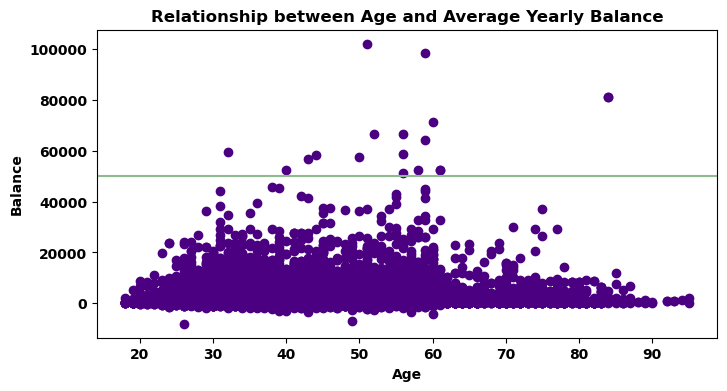

In [19]:
# 1. Age and balance
plt.figure(figsize = [8,4])
plt.title('Relationship between Age and Average Yearly Balance')
plt.scatter(df.age, df.balance, color  = 'indigo')
plt.xlabel('Age')
plt.axhline(y = 50000, color='darkseagreen')
plt.ylabel('Balance')
plt.show()

From the data, we observe a clear positive relationship where mostly individuals aged over 40 tend to have an annual average balance exceeding 50,000.

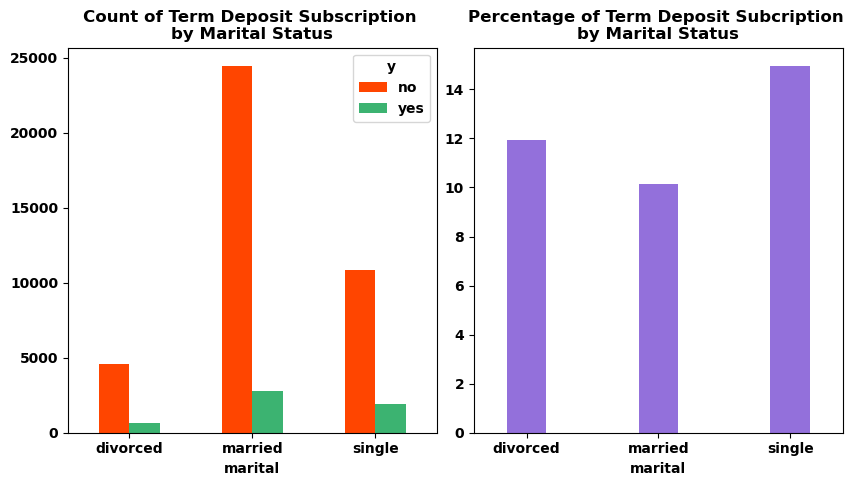

In [20]:
# 2. Marital vs term deposit subscriptions
# Creating subplots
figure, axes = plt.subplots(1,2, figsize=[10,5])

# Creating crosstab table
bary = pd.crosstab(df.marital , df.y)

# Visualizing the table
bary.plot.bar(ax=axes[0],color = ['orangered' , 'mediumseagreen'])
axes[0].set_title('Count of Term Deposit Subscription \nby Marital Status')
axes[0].set_xticklabels(bary.index, rotation = 0)


# Plotting the percentage subscription rate in each category
yes_y_marital = df.marital[df.y == 'yes'].value_counts()
desired_order = ['divorced', 'married', 'single']
yes_y_marital = yes_y_marital.reindex(desired_order, fill_value=0)
marital = df.marital.value_counts()
calculation = ((yes_y_marital / marital)*100)

# Visualizing data
calculation.plot.bar(width = 0.3, color = 'mediumpurple')
axes[1].set_title('Percentage of Term Deposit Subcription \nby Marital Status')
axes[1].set_xticklabels(yes_y_marital.index , rotation = 0)

plt.subplots_adjust(wspace=0.1) 
plt.show()

The chart highlights an intriguing observation: 
- Married individuals account for a higher total number of term deposit subscriptions but the percentage of married people subscribing is lower compared to singles.
- Singles, followed by divorced individuals, are more likely to invest in term deposits relative to their group size.

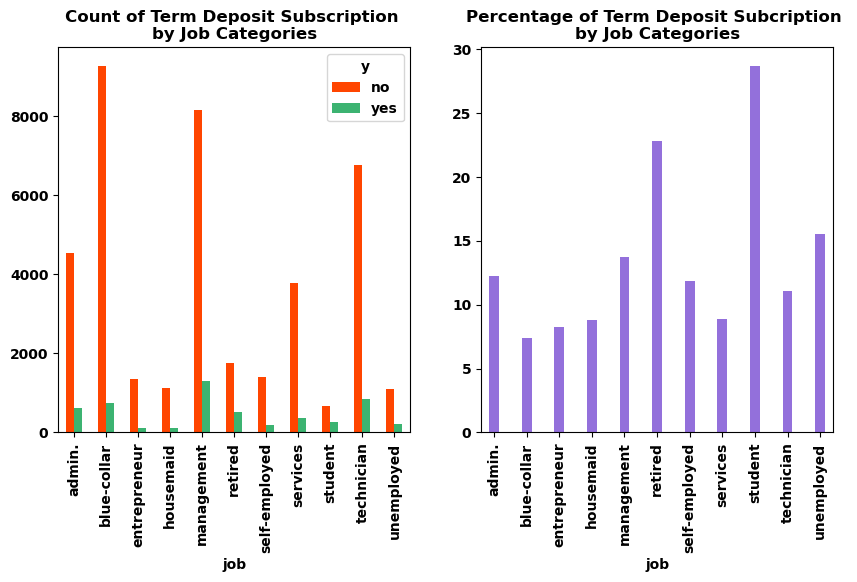

In [21]:
# 3.Job vs term deposit subscriptions
# Creating subplots
figure, axes = plt.subplots(1,2, figsize=[10,5])

# Creating crosstab table
bary = pd.crosstab(df.job , df.y)

# Visualizing the table
bary.plot.bar(ax=axes[0],color = ['orangered' , 'mediumseagreen'])
axes[0].set_title('Count of Term Deposit Subscription \nby Job Categories')
axes[0].set_xticklabels(bary.index, rotation = 90)


# Plotting the percentage subscription rate in each category
yes_y_job = df.job[df.y == 'yes'].value_counts()
desired_order = bary.index
yes_y_job= yes_y_job.reindex(desired_order, fill_value=0)
job = df.job.value_counts()
calculation = ((yes_y_job / job)*100)

# Visualizing data
calculation.plot.bar(width = 0.3, color = 'mediumpurple')
axes[1].set_title('Percentage of Term Deposit Subcription \nby Job Categories')
axes[1].set_xticklabels(yes_y_job.index , rotation = 90)

plt.show()

From the chart, the following insights are evident:

- Despite their smaller numbers (less than a thousand), students have a high subscription rate of over 25%.
- With around 2,300 individuals, retirees have a subscription rate of approximately 22%.
- Blue-collar Workers: Although they are the largest customer group at the bank, blue-collar workers have the lowest subscription rate at just 7%.

### 5.2 Multivariate Analysis

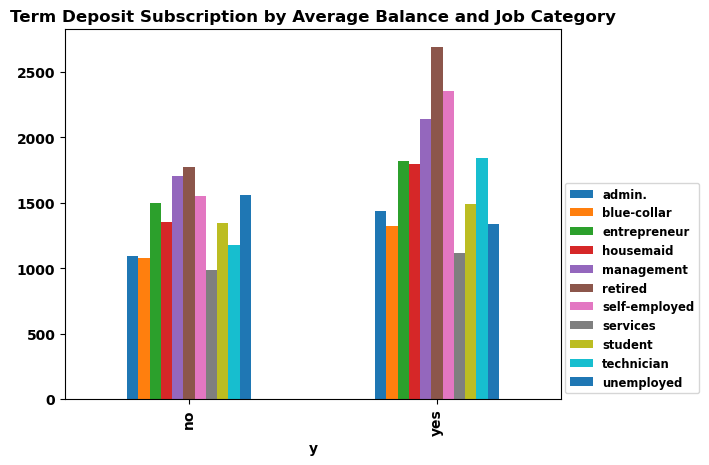

In [22]:
# 1.  Contribution of Balance and Job Titles towards Term deposit subscription
pd.pivot_table(df , values = 'balance' , index = 'y' , columns = 'job', aggfunc = 'mean').plot.bar()
plt.legend(loc='lower right',fontsize='small',bbox_to_anchor=(1.29, 0))
plt.title("Term Deposit Subscription by Average Balance and Job Category")
plt.show()

From the chart, it is evident that individuals with higher average balances are more likely to subscribe to term deposits, a trend particularly noticeable among retirees. Although there are variations across job categories, such as unemployed individuals, this suggests that other factors may also affect subscription rates. Overall, a higher balance seems to have a positive influence on term deposit subscriptions.

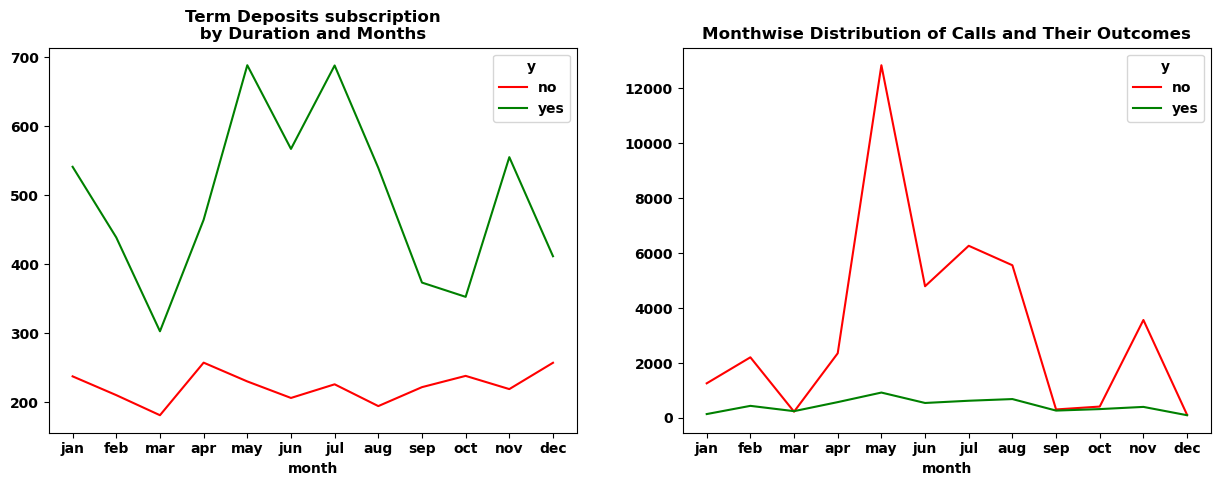

In [23]:
# 2. Plotting the duration vs the months vs the Subscription decision
figure, axes = plt.subplots(1,2 , figsize = (15,5))

#creating pivot table
md_subscription = pd.pivot_table(df, values = 'duration', columns = 'y' , index = 'month').reindex(['jan' , 'feb' , 'mar' , 'apr' , 'may' , 'jun' , 
                                                                                                    'jul' , 'aug', 'sep' , 'oct', 'nov' , 'dec'])

#Plotting the line chart of duration across months
md_subscription.plot.line(ax = axes[0],color = ['red' , 'green'])
axes[0].set_xticks( ticks = range(len(md_subscription.index)) , labels = md_subscription.index)
axes[0].set_title('Term Deposits subscription\n by Duration and Months ')

# calculating table
no_ofcalls = pd.pivot_table(df,columns = 'y' ,values = 'job', index = 'month' , aggfunc = 'count').reindex(md_subscription.index)

#plotting the table
no_ofcalls.plot.line(ax = axes[1],color = ['red' , 'green'])
axes[1].set_xticks( ticks = range(len(no_ofcalls .index)) , labels = no_ofcalls .index)
axes[1].set_title("Monthwise Distribution of Calls and Their Outcomes")

plt.show()

In [24]:
# Calculating the percentage of people spoke over 300 seconds who subscribed
print('Percentage of people with duration > 300 among the total subscription:',\
      round(df.y[(df.duration>300) &(df.y == 'yes')].shape[0]/df.y[df.y == 'yes'].shape[0]*100,2),'%')

Percentage of people with duration > 300 among the total subscription: 65.38 %


- There is a noticeable difference in call durations between subscribers and non-subscribers. Subscribers have a minimum average call duration of 302 seconds per month, while non-subscribers have a maximum average call duration of 257 seconds. This suggests that longer call durations are strongly associated with higher subscription rates.
- The right chart indicates that the subscription rate remains relatively stable throughout the months, whereas there is significant fluctuation in the number of non-subscribed calls. Notably, rejections peak around April and May, while in September and October, the numbers of 'yes' and 'no' responses are almost equal.

`Suggestion:`
Based on the analysis, it is recommended to prioritize individuals with higher bank balances, students, and retirees—especially those who are single or divorced—when reaching out for term deposit subscriptions. Additionally, ensuring that conversations with these potential customers extend beyond 300 seconds can significantly increase the likelihood of subscription.

## 6. Data Preparation for Modeling

#### 6.1 One-Hot Encoding

In [25]:
# Let us convert the variables with 'yes' or 'no' values to 1s and 0s
binary_var = ['housing' , 'loan' , 'default' , 'y']

# Converting the values
df[binary_var] = df[binary_var].apply(lambda x : x.map({'yes':1 , 'no' :0}))

# Verify
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,5,may,198,1,0,0


Let us use similar encoding for the 'contact' column by assigning 0 to telephone and 1 to cellular.

In [26]:
# Converting the values
df.contact = df.contact.map({'cellular':1 , 'telephone' :0})

# Verify
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,0,2143,1,0,1,5,may,261,1,0,0
1,44,technician,single,secondary,0,29,1,0,1,5,may,151,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,1,5,may,76,1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,1,5,may,92,1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,1,5,may,198,1,0,0


#### 6.1.1 Dummy Encoding
Let us utilize dummy encoding to convert the rest of the categorical variables into binary values.
1. job
2. marital
3. education

In [27]:
# 1. Dummy encoding for job and converting to 1s and os
dummy_job = pd.get_dummies(df.job, prefix = 'job', drop_first = True)
dummy_job = dummy_job.apply(lambda x : x.map({True:1 , False :0}))

# 2. Dummy encoding for marital and converting to 1s and os
dummy_marital = pd.get_dummies(df.marital, prefix = 'marital', drop_first = True)
dummy_marital = dummy_marital.apply(lambda x : x.map({True:1 , False :0}))

# 3. Dummy encoding for education and converting to 1s and os
dummy_edu = pd.get_dummies(df.education, prefix = 'edu').iloc[: , :-1]
dummy_edu = dummy_edu.apply(lambda x : x.map({True:1 , False :0}))

# Merging the created dataframes to the original data frames
df = pd.concat([df, dummy_job, dummy_marital, dummy_edu] , axis = 1)

# Dropping the original variables
df.drop(['job' , 'marital' , 'education'] , inplace = True , axis = 1)

# Verify
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,edu_primary,edu_secondary
0,58,0,2143,1,0,1,5,may,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,1,5,may,151,1,...,0,0,0,0,1,0,0,1,0,1
2,33,0,2,1,1,1,5,may,76,1,...,0,0,0,0,0,0,1,0,0,1
3,47,0,1506,1,0,1,5,may,92,1,...,0,0,0,0,0,0,1,0,0,1
4,33,0,1,0,0,1,5,may,198,1,...,0,0,0,0,0,0,0,1,0,1


#### 6.2 Label Encoding

Let us create a function to use label encoder for the 'month' column since it has ordinal values.

In [28]:
# Function for encoding month
def month_encoder(month):

    # Creating lists of values
    numbers = [x for x in range(1,13)]
    months = ['jan' , 'feb' , 'mar' , 'apr' , 'may' , 'jun','jul' , 'aug', 'sep' , 'oct', 'nov' , 'dec']

    # Assigning the list values to create a dictionary
    month_dic ={}
    for x,y in zip(months , numbers):
        month_dic[x] = y

    # returning the month value
    return month_dic.get(month)
    
# Encoding the month column
df.month = list(map(month_encoder , df.month))

# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   default            45211 non-null  int64
 2   balance            45211 non-null  int64
 3   housing            45211 non-null  int64
 4   loan               45211 non-null  int64
 5   contact            45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  previous           45211 non-null  int64
 11  y                  45211 non-null  int64
 12  job_blue-collar    45211 non-null  int64
 13  job_entrepreneur   45211 non-null  int64
 14  job_housemaid      45211 non-null  int64
 15  job_management     45211 non-null  int64
 16  job_retired        45211 non-null  int64
 17  job_self-emp

Now we have converted all the data to numeric format and prepared it for modeling. Let us view the correlation among the features.

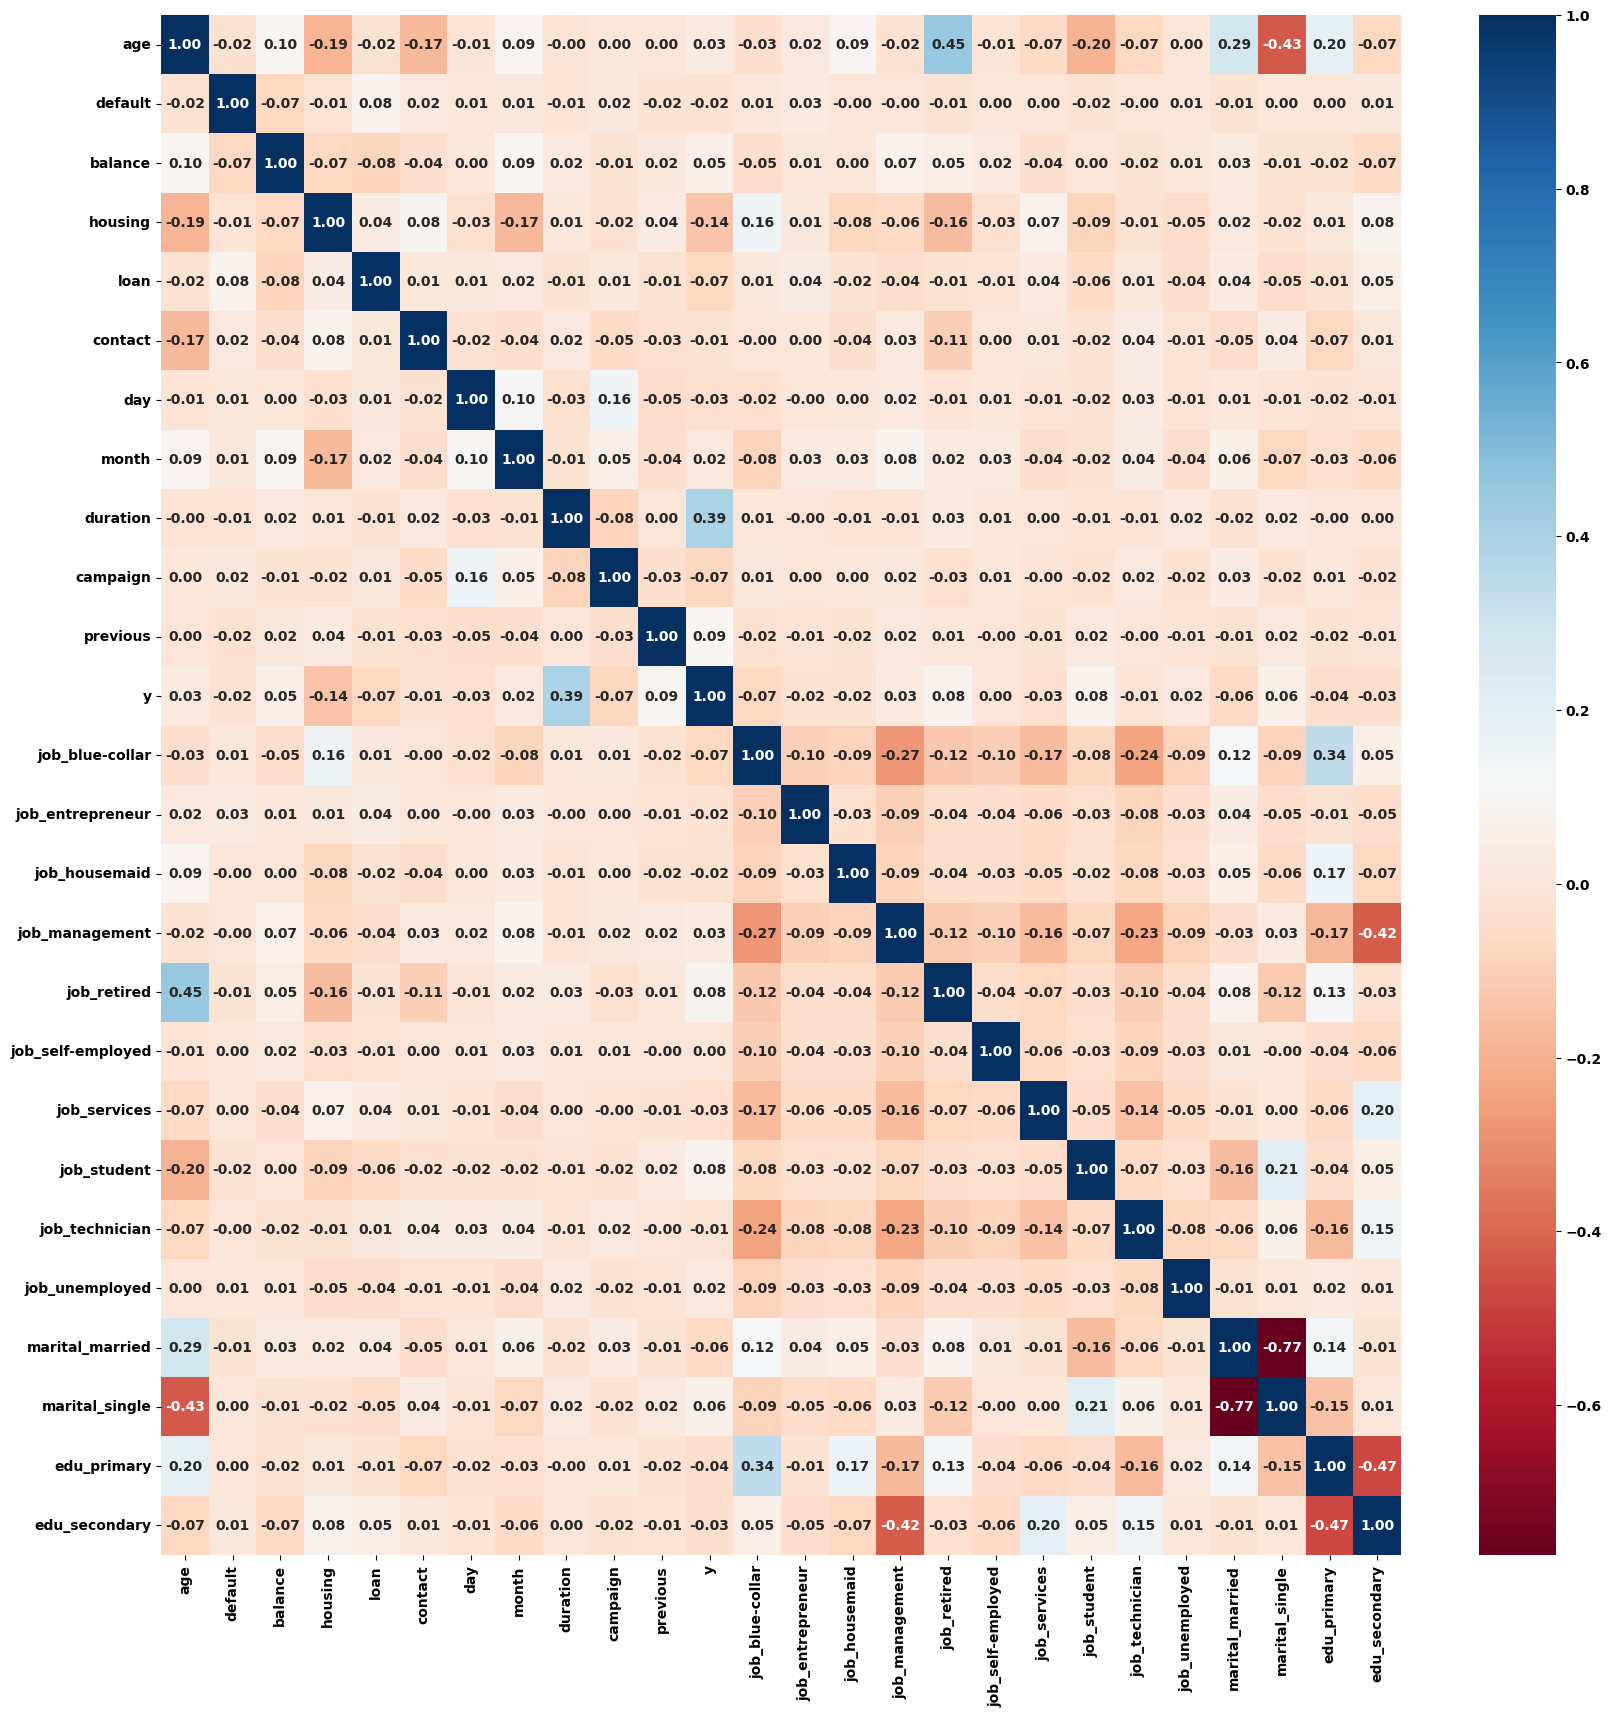

In [29]:
# Visualizing correlation among features
plt.figure(figsize = (20 , 20))
sns.heatmap(df.corr() , annot = True, cmap = 'RdBu' , fmt = '.2f')
plt.show()

Except for 'marital_single' and 'marital_married', there is no significant multicollinearity among the variables. However, this is not a concern for our model, as we are using a decision tree, which is robust to multicollinearity.

#### 6.3 Train Test Split

In [30]:
# Importing library
from sklearn.model_selection import train_test_split

#Splitting the data
train , test = train_test_split(df , test_size = 0.25 , random_state = 31)

# Verify
print('Train data size : ' , train.shape)
print('Test data size : ' , test.shape)

Train data size :  (33908, 26)
Test data size :  (11303, 26)


In [31]:
# Splitting train data
y_train = train.pop('y')
X_train = train

# Splitting test data
y_test = test.pop('y')
X_test = test

# Verify
print('Train data size : \n X : ' , X_train.shape , 'y : ', y_train.shape, '\n')
print('Test data size : \n X : ' , X_test.shape , 'y : ', y_test.shape)

Train data size : 
 X :  (33908, 25) y :  (33908,) 

Test data size : 
 X :  (11303, 25) y :  (11303,)


#### 6.4 Resampling Class Imbalance

In [32]:
# Viewing the subscription rate
print( 'Subscription rate : ', round((y_train[y_train== 1].shape[0]/y_train.shape[0]) , 2)*100 , '%')
y_train.value_counts()

Subscription rate :  12.0 %


y
0    29910
1     3998
Name: count, dtype: int64

We have observed that the subscription rate is only 12%, leading to a significant class imbalance. To address this issue, we will use the SMOTE (Synthetic Minority Over-sampling Technique) method to resample the data.

#### 6.4.1 SMOTE Algorithm

In [33]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Viewing imbalance
counter = Counter(y_train)
print('Before Sampling :' , counter)

Before Sampling : Counter({0: 29910, 1: 3998})


In [34]:
# Over sampling the Class 1 in train dataset using SMOTE
smt = SMOTE()

# Fitting the data
X_train, y_train = smt.fit_resample(X_train, y_train)

# Viewing imbalance
counter = Counter(y_train)
print('After Sampling :' , counter)

After Sampling : Counter({1: 29910, 0: 29910})


Now that the classes are balanced, we can proceed with model creation.

## 7. Building Decision Tree

In [35]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier

# Model 1
# Instantiating the algorithm
dt = DecisionTreeClassifier(max_depth = 3, random_state=31 )

#Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=31)

In [36]:
# Importing libraries for decision tree visualization
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

#### 7.1 Visualizing Decision Tree

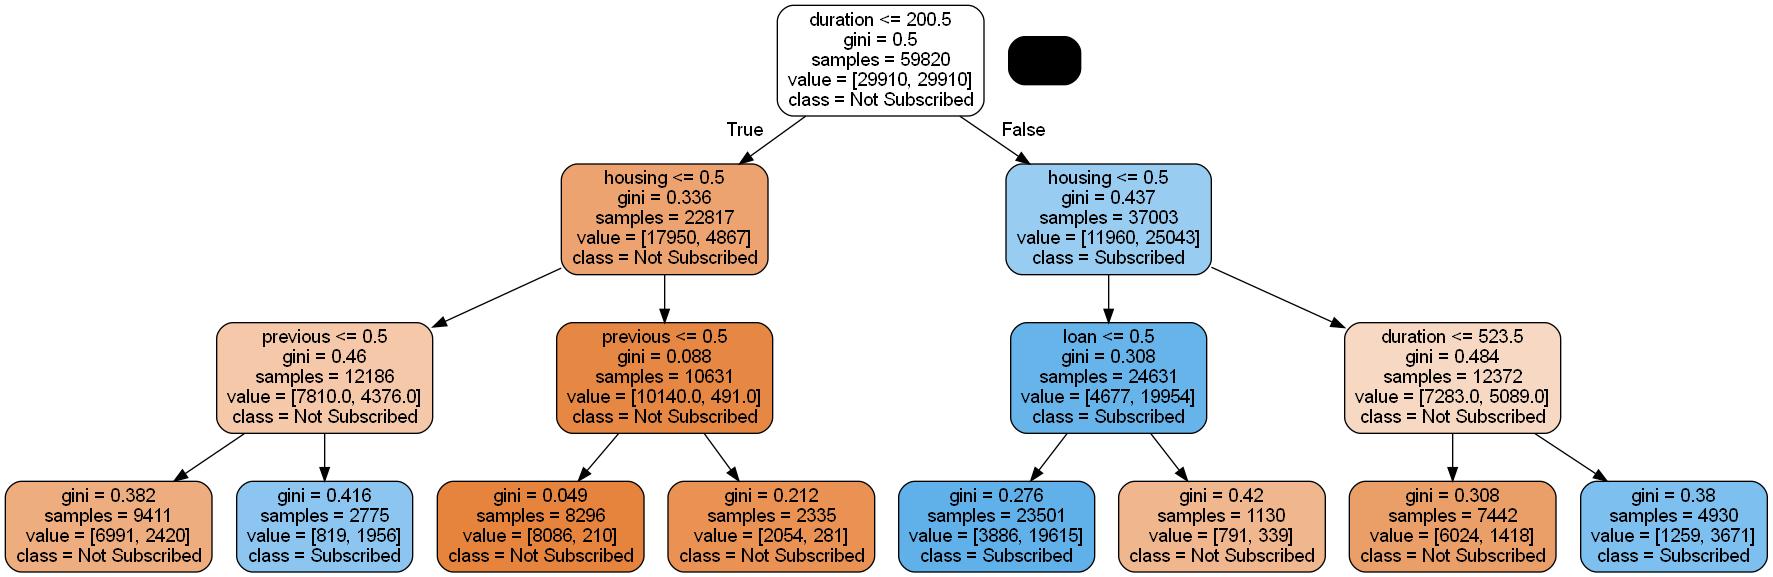

In [37]:
# Standard code for decision tree visualization
dot_data = StringIO()

export_graphviz(dt ,out_file = dot_data , filled = True ,  rounded = True , \
                feature_names = ['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day','month', 'duration', 'campaign', 'previous', 
                                 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired','job_self-employed', 
                                 'job_services', 'job_student', 'job_technician','job_unemployed', 'marital_married', 'marital_single', 
                                 'edu_primary','edu_secondary'], class_names = ['Not Subscribed' , 'Subscribed'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [38]:
# Import libraries for metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# Predicting the target variable on train set
y_train_pred = dt.predict(X_train)

# Accuracy on training data
print('Accuracy: ', round(accuracy_score(y_train , y_train_pred)*100 , 2) , '%')

#viewing the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix : \n' , cm)

Accuracy:  82.23 %
Confusion matrix : 
 [[23946  5964]
 [ 4668 25242]]


In [39]:
#Confusion matrix
# Predicted         Not_Subscribed    Subscribed
# Actual           
# Not_Subscribed      24005                5905
# Subscribed           4721               25189

In [40]:
# Importing library
from sklearn.metrics import classification_report

# Viewing the classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     29910
           1       0.81      0.84      0.83     29910

    accuracy                           0.82     59820
   macro avg       0.82      0.82      0.82     59820
weighted avg       0.82      0.82      0.82     59820



The model is performing well on the training data, with an overall `Accuracy` and `F1 score` of `82%`. This indicates that the model is fitting the training data adequately. To better understand its performance, we should evaluate the model on the test set.

In [41]:
# Predicting the target variable on test set
y_test_pred = dt.predict(X_test)

# Viewing the classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     10012
           1       0.32      0.74      0.44      1291

    accuracy                           0.79     11303
   macro avg       0.64      0.77      0.66     11303
weighted avg       0.89      0.79      0.82     11303



From the classification report on the test set, we can observe that the F1 score for Class 0 has increased to 87%, whereas for Class 1, it is only 44%. This lower F1 score for Class 1 is primarily due to the precision being just 32%.

In our bank dataset, we aim to identify customers who are most likely to subscribe to term deposits. Our goal is to focus on capturing all potential leads, so we want our model to achieve a `high recall rate`. This means the model should identify as many customers as possible who are likely to subscribe, even if it results in some false positives.

#### 7.1 Hyper parameter Tuning

Let us use GridSearcCV to tune our hyperparameters, it is a powerful tool for systematically searching for the best hyperparameters. We will use this cross validation method to pick the best combination of hyperparameters for our decision tree model.

The accuracy on the test dataset has decreased by 3%, and the F1 score has dropped significantly. To address this, we can use GridSearchCV to find the best parameters for the decision tree model and perform hyperparameter tuning.

#### 7.2 Hyperparameter Tuning

In [54]:
# Importing necessary library
from sklearn.model_selection import GridSearchCV

# Defining the model
model = DecisionTreeClassifier(random_state = 31)

# Defining the parameter grid
param_grid = {'max_depth': [3, 5, 7, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Viewing the best parameters
best_params = grid_search.best_params_
print('Best parameters chosen by GridSearchCV : \n')
print(best_params)

Best parameters chosen by GridSearchCV : 

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [55]:
# Model 2 - Building a model with suggestion from GridSearchCV
# Instantiating the algorithm
dt_2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, random_state=31, max_features = None , min_samples_leaf = 2 , min_samples_split = 10)

#Fitting the model
dt_2 = dt_2.fit(X_train, y_train)

# Predicting the target variable on train set
y_train_pred_2 = dt_2.predict(X_train)

# Predicting the target variable on test set
y_test_pred_2 = dt_2.predict(X_test)

# Accuracy on training data
print('Accuracy on Train set: ', round(accuracy_score(y_train , y_train_pred_2)*100 , 2) , '%')

# Accuracy on test data
print('Accuracy on Test set: ', round(accuracy_score(y_test , y_test_pred_2)*100,2) , '%')


# Printing the classification report of Train and test dataset
print('Train report : \n', classification_report(y_train, y_train_pred_2))

print(' Test report : \n' ,classification_report(y_test, y_test_pred_2))

Accuracy on Train set:  86.13 %
Accuracy on Test set:  82.14 %
Train report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     29910
           1       0.85      0.88      0.86     29910

    accuracy                           0.86     59820
   macro avg       0.86      0.86      0.86     59820
weighted avg       0.86      0.86      0.86     59820

 Test report : 
               precision    recall  f1-score   support

           0       0.96      0.84      0.89     10012
           1       0.36      0.70      0.47      1291

    accuracy                           0.82     11303
   macro avg       0.66      0.77      0.68     11303
weighted avg       0.89      0.82      0.84     11303



After tuning, the model shows strong performance on both the test and training datasets, achieving a test accuracy of 82%.

To improve performance, let's find the optimal threshold to maximize both accuracy and recall, as our business objective is to identify all potential leads for subscription.

#### 7.3 Precision-Recall-Curve

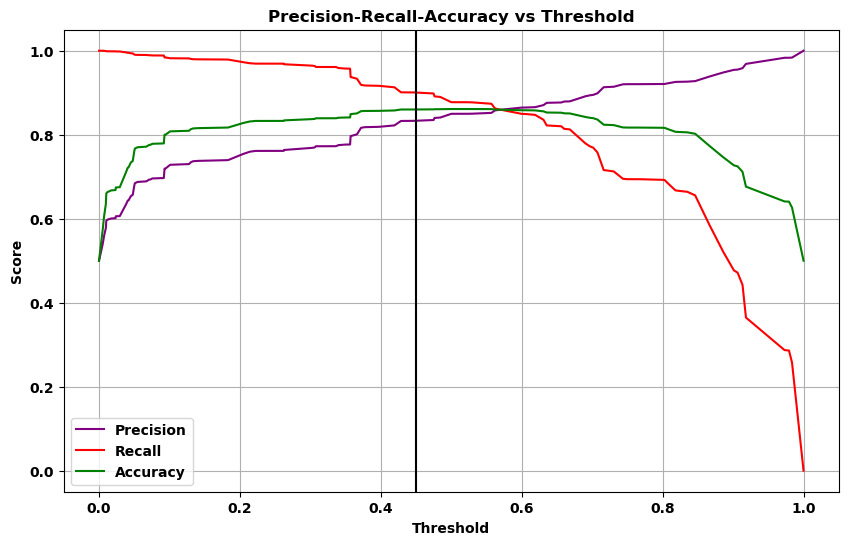

In [56]:
#Importing library
from sklearn.metrics import precision_recall_curve

# Collecting probabilities
y_scores = dt_2.predict_proba(X_train)[:, 1]

# Collecting precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

accuracies = []
for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    accuracies.append(accuracy_score(y_train, y_pred))

# Plotingt the Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision' , color = 'purple')
plt.plot(thresholds, recalls[:-1], label='Recall' , color = 'red')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.axvline(x = 0.45 , color = 'black')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
# Choosing the optimal threshold
optimal_threshold = 0.45

# Collecting the theshold
y_scores_threshold = dt_2.predict_proba(X_train)[:, 1]

# Converting the predicted probabilities into binary values based on threshold
y_train_pred_threshold = (y_scores_threshold >= optimal_threshold).astype(int)

#Viewing the classification report
print('Train data:')
print(classification_report(y_train , y_train_pred_threshold))

Train data:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     29910
           1       0.83      0.90      0.87     29910

    accuracy                           0.86     59820
   macro avg       0.86      0.86      0.86     59820
weighted avg       0.86      0.86      0.86     59820



In [58]:
# Collecting the theshold
y_scores_threshold = dt_2.predict_proba(X_test)[:, 1]

# Converting the predicted probabilities into binary values based on threshold
y_test_pred_threshold = (y_scores_threshold >= optimal_threshold).astype(int)

#Viewing the classification report
print('Testdata:')
print(classification_report(y_test , y_test_pred_threshold))

Testdata:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     10012
           1       0.35      0.77      0.48      1291

    accuracy                           0.81     11303
   macro avg       0.66      0.79      0.68     11303
weighted avg       0.89      0.81      0.84     11303



The model is performing pretty consistent on the test data. Therefore, let's finalize this model and proceed to the evaluate the model on the actual test set.

## 8. Evaluating the model

In [59]:
# Importing test data set
final_test = pd.read_csv(r'D:\Internships\Prodigy\Task3_DecisionTreeClassifier\test.csv')

# Dropping unnecessary columns
final_test.drop( ['poutcome' , 'pdays'], inplace = True, axis = 1)

# Converting 'unknown' values to null values
col = final_test.columns

for column in col:
    final_test[column].replace('unknown', np.nan, inplace=True)

# Viewing percentage of missing values
round((final_test.isnull().sum()[final_test.isnull().sum()>0]*100)/final_test.shape[0],2)

job           0.84
education     4.14
contact      29.29
dtype: float64

Let us impute the values similar to our training data

In [60]:
# Imputing the missing values
final_test.loc[final_test['job'].isna() , 'job'] = 'blue-collar'
final_test.loc[final_test['education'].isna() , 'education'] = 'secondary'
final_test.loc[final_test.contact.isnull(), 'contact'] = 'cellular'

# Verify
# Viewing percentage of missing values
round((final_test.isnull().sum()[final_test.isnull().sum()>0]*100)/final_test.shape[0],2)

Series([], dtype: float64)

All the missing values has been addressed, now lets encode the values and prepare the data for modeling.

In [61]:
# Encoding the values
# 1. month
final_test.month = list(map(month_encoder, final_test.month))

# 2. Binary variables - housing, loan, y, default
final_test[binary_var] = final_test[binary_var].apply(lambda x : x.map({'yes':1 , 'no' :0}))

# 3. job
dummy_job = pd.get_dummies(final_test.job, prefix = 'job', drop_first = True)
dummy_job = dummy_job.apply(lambda x : x.map({True:1 , False :0}))

# 4. marital
dummy_marital = pd.get_dummies(final_test.marital, prefix = 'marital', drop_first = True)
dummy_marital = dummy_marital.apply(lambda x : x.map({True:1 , False :0}))

# 5. education
dummy_edu = pd.get_dummies(final_test.education, prefix = 'edu').iloc[: , :-1]
dummy_edu = dummy_edu.apply(lambda x : x.map({True:1 , False :0}))

# 6. contact
final_test.contact = final_test.contact.map({'telephone' : 0 , 'cellular' : 1})

# Merging the created dataframes to the original data frames
final_test = pd.concat([final_test, dummy_job, dummy_marital, dummy_edu] , axis = 1)

# Dropping the original variables
final_test.drop(['job' , 'marital' , 'education'] , inplace = True , axis = 1)


# Verify
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4521 non-null   int64
 1   default            4521 non-null   int64
 2   balance            4521 non-null   int64
 3   housing            4521 non-null   int64
 4   loan               4521 non-null   int64
 5   contact            4521 non-null   int64
 6   day                4521 non-null   int64
 7   month              4521 non-null   int64
 8   duration           4521 non-null   int64
 9   campaign           4521 non-null   int64
 10  previous           4521 non-null   int64
 11  y                  4521 non-null   int64
 12  job_blue-collar    4521 non-null   int64
 13  job_entrepreneur   4521 non-null   int64
 14  job_housemaid      4521 non-null   int64
 15  job_management     4521 non-null   int64
 16  job_retired        4521 non-null   int64
 17  job_self-emplo

Now we can see all the values are converted to numeric and is in int data type. Let us split the X and y varaibles and proceed for evaluation.

In [62]:
# Splitting the data
y_final = final_test.pop('y')
X_final = final_test

# Verify
print('X_final :' , X_final.shape)
print('y_final : ' , y_final.shape)

X_final : (4521, 25)
y_final :  (4521,)


#### 8.1 Prediction and Metrics

In [63]:
# Predicting on test set
y_final_predict = dt_2.predict_proba(X_final)[:, 1]

# Converting the predicted probabilities into binary values based on threshold
y_final_predict = (y_final_predict >= optimal_threshold).astype(int)

#Viewing the classification report
print(classification_report(y_final , y_final_predict))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      4000
           1       0.34      0.75      0.47       521

    accuracy                           0.81      4521
   macro avg       0.65      0.78      0.68      4521
weighted avg       0.89      0.81      0.83      4521



In [64]:
# Viewing the confusion matrix
confusion_matrix(y_final , y_final_predict)

array([[3249,  751],
       [ 128,  393]], dtype=int64)

__Conclusion :__   

The model is good in terms of recall `78` and overall accuracy `81`, particularly for identifying subscribers, which aligns with the business objective, it could be enhanced to better balance precision and recall, thereby improving its utility in practical scenarios. But for now, the model has been finalized and is ready for deployment based on the identified optimal threshold.